✅ Dataset loaded successfully!
Shape: (1002, 17)

Sample rows:


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive



✅ Missing values handled.
Remaining missing values per column:
 make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

Categorical Features: ['make', 'model', 'engine', 'fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color', 'drivetrain']
Numerical Features: ['year', 'cylinders', 'mileage', 'doors']

Data split complete:
Training samples: 783
Testing samples: 196


/tmp/ipython-input-2690020292.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2690020292.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


📊 Linear Regression Results:
R² Score: 0.818
MAE: 4595.56
RMSE: 7445.31


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.983e+08, tolerance: 2.822e+07
  model = cd_fast.enet_coordinate_descent(



📊 Lasso Regression Results:
R² Score: 0.792
MAE: 4428.15
RMSE: 7963.72


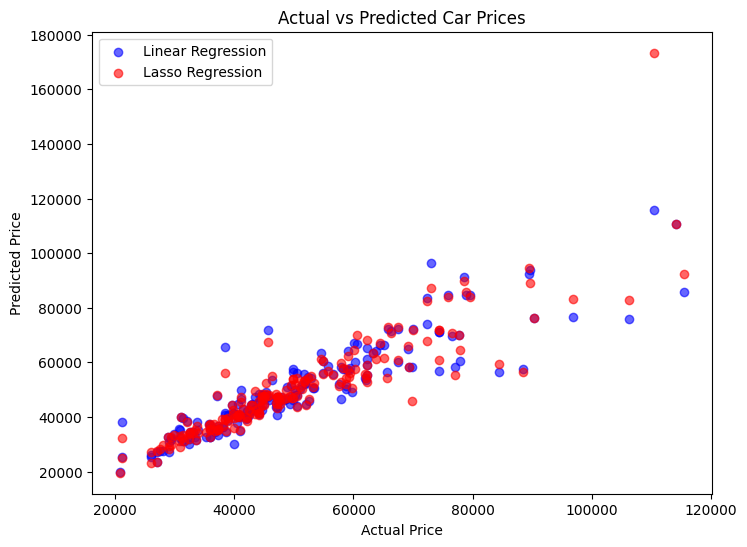


✅ Predictions saved to predicted_prices.csv


In [1]:
# ==============================================
# 🚗 Car Price Prediction (Updated for dataset.csv)
# ==============================================

# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

# ==============================================
# ✅ Step 2: Load the new dataset
# ==============================================
# Make sure the file is uploaded to your Colab session or in /content/dataset.csv
df = pd.read_csv("dataset.csv")

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nSample rows:")
display(df.head())

# ==============================================
# ✅ Step 3: Data Cleaning
# ==============================================

# Drop columns that are not useful for prediction
df = df.drop(columns=['name', 'description'], errors='ignore')

# Drop rows with missing target values
df = df.dropna(subset=['price'])

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna('Unknown', inplace=True)

print("\n✅ Missing values handled.")
print("Remaining missing values per column:\n", df.isnull().sum())

# ==============================================
# ✅ Step 4: Feature Selection
# ==============================================
# Define features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

# Separate categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

# ==============================================
# ✅ Step 5: Preprocessing Pipeline
# ==============================================
# OneHotEncode categorical features, keep numerical as is (with scaling)
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

# ==============================================
# ✅ Step 6: Train/Test Split
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split complete:")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# ==============================================
# ✅ Step 7: Model Training - Linear Regression
# ==============================================
linreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

linreg_pipeline.fit(X_train, y_train)
y_pred_linreg = linreg_pipeline.predict(X_test)

# Evaluate
linreg_r2 = metrics.r2_score(y_test, y_pred_linreg)
linreg_mae = metrics.mean_absolute_error(y_test, y_pred_linreg)
linreg_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg))

print("\n📊 Linear Regression Results:")
print(f"R² Score: {linreg_r2:.3f}")
print(f"MAE: {linreg_mae:.2f}")
print(f"RMSE: {linreg_rmse:.2f}")

# ==============================================
# ✅ Step 8: Model Training - Lasso Regression
# ==============================================
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=1.0))
])

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

# Evaluate
lasso_r2 = metrics.r2_score(y_test, y_pred_lasso)
lasso_mae = metrics.mean_absolute_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

print("\n📊 Lasso Regression Results:")
print(f"R² Score: {lasso_r2:.3f}")
print(f"MAE: {lasso_mae:.2f}")
print(f"RMSE: {lasso_rmse:.2f}")

# ==============================================
# ✅ Step 9: Visual Comparison
# ==============================================
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linreg, color='blue', label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_lasso, color='red', label='Lasso Regression', alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()

# ==============================================
# ✅ Step 10: (Optional) Save predictions to CSV
# ==============================================
results = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price (Linear)': y_pred_linreg,
    'Predicted Price (Lasso)': y_pred_lasso
})
results.to_csv("/content/predicted_prices.csv", index=False)
print("\n✅ Predictions saved to predicted_prices.csv")
